# Lending Club (Decision Trees)

## Load Libraries and Data

In [1]:
# Load packages
import io
import requests 
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import (cross_validate, train_test_split,
                                     GridSearchCV)
from matplotlib import pyplot as plt
import seaborn as sns

# Make this notebook's output stable across runs
random_state = 10
np.random.seed(random_state)

# Options for plots
%matplotlib inline
sns.set()

# Do not use scientific notation in pandas tables
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
url = 'https://raw.githubusercontent.com/natecraig/aiml/main/Data/Lending Club.csv'
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')), low_memory=False)
df.head()
df.shape

(100000, 151)

In [3]:
# Take a random sample of 10,000 observations to make computation faster

# Note that we would not want to do this when building a model for production
df = df.sample(n=10_000)
df.shape

(10000, 151)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
33226,30064803,NaN,"6,000.0000","6,000.0000","6,000.0000",36 months,11.6700,198.3500,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
64804,5948239,NaN,"6,625.0000","6,625.0000","6,625.0000",36 months,11.5500,218.6300,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
39763,17714025,NaN,"10,850.0000","10,850.0000","10,850.0000",36 months,14.9900,376.0700,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
51270,11624789,NaN,"6,150.0000","6,150.0000","6,150.0000",36 months,14.9800,213.1400,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9698,8414592,NaN,"10,000.0000","10,000.0000","10,000.0000",36 months,7.9000,312.9100,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Determine whether each borrower is a defaulter (1) or repayer (0)
def loan_default(status):
    if status == 'Default' or status == 'Charged Off':
        return 1

    return 0


df['default'] = df['loan_status'].apply(loan_default)
df['default'].value_counts()

0    8330
1    1670
Name: default, dtype: int64

In [6]:
# What percent of borrowers do not default?
1 - df['default'].mean()

0.833

## Example Decision Tree

In [7]:
# Extract features (X) and target (y)
feature_names = ['dti', 'fico_range_high']
X = df[feature_names]
y = df['default']

# Split data into training and testing sets
(X_train, X_test, 
 y_train, y_test) = train_test_split(X, y, test_size=0.2,
                                     stratify=y, random_state=random_state)

In [8]:
# Fit a decision tree with depth 2 and assess performance using accuracy
# on training data
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=random_state)
perf = cross_validate(tree_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f'Accuracy: {perf["test_score"].mean():.4f}')

Accuracy: 0.8330


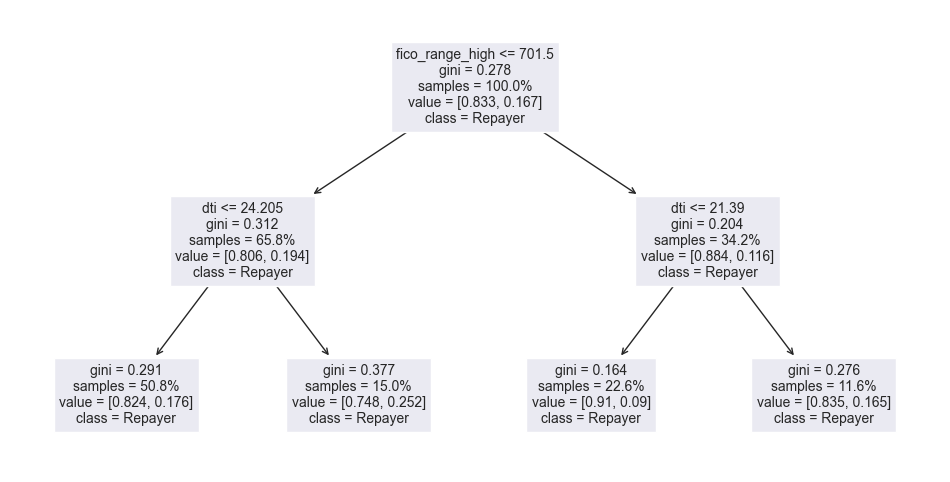

In [9]:
# Visualize the decision tree
class_names = ['Repayer', 'Default']
tree_clf.fit(X_train, y_train)

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(tree_clf, proportion=True,
               feature_names=feature_names,
               class_names=class_names, fontsize=10)
plt.show()


Accuracy: 0.8330


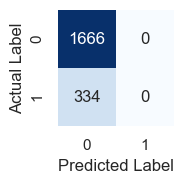

In [10]:
# Visualize performance on test data with a confusion matrix
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

dfcm = pd.DataFrame(confusion_matrix(y_test, y_pred))

plt.figure(figsize = (2, 2))
sns.heatmap(dfcm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()